# Statystyka zestaw 1

## Problem A1

### a) Implementacja generatoru liczb losowych z rozkladu normalnego N(µ,σ2) metoda Polarna:
### µ = 0 - wartosc oczekiwania; 
### σ2 = 1 - wariacja; 


In [68]:
from numpy import random, sqrt, log, sin, cos, pi

def problem_A1(n = 1):
    x1 = random.rand(n)
    x2 = random.rand(n)
    
    r = sqrt(-2 * log(x1))
    y1 = r*cos(2 * pi * x2)
    y2 = r*sin(2 * pi * x2)
    
    return y1, y2

problem_A1()

(array([-0.52923554]), array([-0.33900895]))

## b) Narysowanie histogramu i porównianie ze wzorem analitycznym

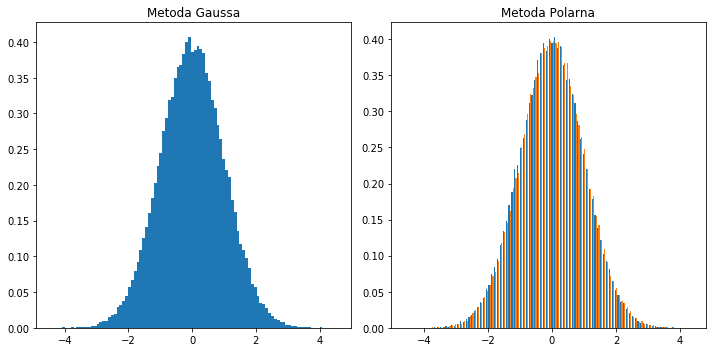

In [69]:
from matplotlib import pyplot
from numpy import random

size = 100000
number_of_bins = 100

fig, axs = pyplot.subplots(1, 2, figsize=(10, 5), tight_layout=True)

axs[0].hist(random.normal(size=size), density=True, bins=number_of_bins)
axs[0].title.set_text('Metoda Gaussa')

axs[1].hist(problem_A1(size), density=True, bins=number_of_bins)
axs[1].title.set_text('Metoda Polarna')

pyplot.show()

## c) Obliczyc eksperymentalne znaczenia dla wartosci sredniej oraz wariancji

In [70]:
## nie jestem pewien ktora zmienna powinnismy przelicac tutaj

size = 100000
results = problem_A1(size)
sumAll = 0
for i in results[1]:
    sumAll += i
avg = sumAll/size
print(f'Average value of Polar method equals: {avg}')

Average value of Polar method equals: -0.0014271495891669003


## Problem B i C
### Ruina gracza dla 2 graczy A,B
### Kapitaly poczatkowe A,B: 
### a = 50; b=50 
### Porównanie z wynykiem analitycznym dla roznych a,b

In [71]:
import numpy

n_simulations = 1000
wins = 0

prob_B_win = 0.5
A_balance = 70
B_balance = 30
winsOfA = 0

bet = 2

for i in range(n_simulations):
    A_current_balance = A_balance
    B_current_balance = B_balance

    while A_current_balance > 0 and B_current_balance > 0:
        a_win = numpy.random.uniform(0, 1) < prob_B_win

        if a_win:
            winsOfA += 1
            A_current_balance = A_current_balance + bet
            B_current_balance = B_current_balance - bet
        else:
            A_current_balance = A_current_balance - bet
            B_current_balance = B_current_balance + bet

    if A_current_balance > 0: wins += 1 

prob_a_wins = wins/n_simulations

print(f'A wygrywal z prawdopodobienstwem: {prob_a_wins}')
print(f'B wygrywal z prawdopodobienstwem: {1 - prob_a_wins}')

ruinsA = 1 - (A_balance/(B_balance + A_balance))
ruinsB = 1 - (B_balance/(B_balance + A_balance))
print(f'Wzor analityczny dla ruiny gracza a : {ruinsA}')
print(f'Wzor analityczny dla ruiny gracza b : {ruinsB}')

A wygrywal z prawdopodobienstwem: 0.702
B wygrywal z prawdopodobienstwem: 0.29800000000000004
Wzor analityczny dla ruiny gracza a : 0.30000000000000004
Wzor analityczny dla ruiny gracza b : 0.7


## Problem D
### Liczba rozgrywek do ukonczenia gry - L
### Wyliczyc srednia dlugosc rozgrywki
### pA = 1/2, 1/5, 4/5; a = b = 50; calkowita liczba gier = 20000 

In [72]:
import numpy

simulations = 20000

prob_B_win = 0.5
A_balance = 50
B_balance = 50
bet = 2
number_of_games_in_single_party = []
for i in range(simulations):
    A_current_balance = A_balance
    B_current_balance = B_balance
    games = 0
    while A_current_balance > 0 and B_current_balance > 0:
        games += 1
        a_win = numpy.random.uniform(0, 1) < prob_B_win

        if a_win:
            winsOfA += 1
            A_current_balance = A_current_balance + bet
            B_current_balance = B_current_balance - bet
        else:
            A_current_balance = A_current_balance - bet
            B_current_balance = B_current_balance + bet
    number_of_games_in_single_party.append(games)
print(f'Average number of games {sum(number_of_games_in_single_party)/simulations}')


Average number of games 626.3314


## Problem G
### Trajektoria liczby wygranych dla 1 z 2 graczy
### dla kilku gier(do 10) dla róznych wartosci 
### pA: 1/2, 1/5, 4/5 
### Trajektoria kapitalu dla 1 z 2 graczy

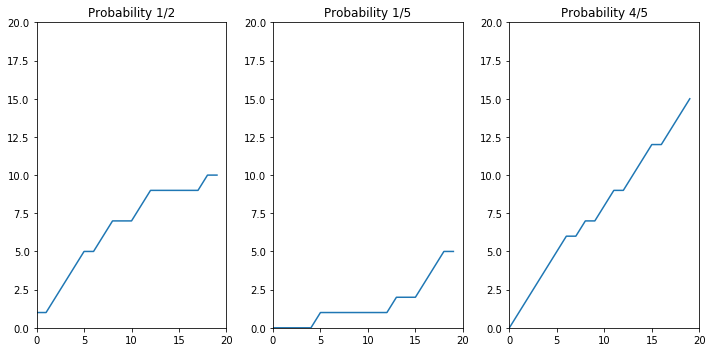

In [80]:
import numpy
import matplotlib.pyplot as plt

def simulation(prob):
    simulations = 20

    wins_overall = 0

    A_balance = 50
    B_balance = 50
    bet = 2
    number_of_games_won = []

    for i in range(simulations):
        a_win = numpy.random.uniform(0, 1) < prob

        if a_win:
            wins_overall += 1
            number_of_games_won.append(wins_overall)
            A_balance = A_balance + bet
            B_balance = B_balance - bet
        else:
            number_of_games_won.append(wins_overall)
            A_balance = A_balance - bet
            B_balance = B_balance + bet
    return number_of_games_won
        
fig, axs = pyplot.subplots(1, 3, figsize=(10, 5), tight_layout=True)
axs[0].plot(simulation(0.5))
axs[0].title.set_text('Probability 1/2')
axs[0].set_xlim([0, simulations])
axs[0].set_ylim([0, simulations])

axs[1].plot(simulation(0.2))
axs[1].title.set_text('Probability 1/5')  
axs[1].set_xlim([0, simulations])
axs[1].set_ylim([0, simulations])

axs[2].plot(simulation(0.8))
axs[2].title.set_text('Probability 4/5')
axs[2].set_xlim([0, simulations])
axs[2].set_ylim([0, simulations])

# plt.plot(win_per_round)
# plt.xlim(0,simulations)
# plt.ylim(0,simulations)
# plt.ylabel('Wins')
# plt.xlabel('Number of party')
plt.show()